In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy.optimize import root

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

# Units

In [2]:
G_pu = 6.67430e-8       #cm^3*s/g
r_pu = 1.49597870707e13 #cm
m_pu = 1.989e33         #g

v_pu = np.sqrt(G_pu * m_pu / r_pu)
print("v_pu/v_iu = ", v_pu, "(cm/s)/iu")

v_pu/v_iu =  2978911.131907573 (cm/s)/iu


# Total Energy Check

In [3]:
data = pandas.read_csv('./twobody.in',
                        sep='\s+',
                        names=['mass', 'x', 'y', 'z', 'vx', 'vy', 'vz'],
                        engine='python')

In [4]:
m1 = 1
m2 = 1/1000

pos1 = data.iloc[2].to_numpy()[1:4]
pos2 = data.iloc[3].to_numpy()[1:4]
r = pos2-pos1

v1 = data.iloc[2].to_numpy()[4:]
v2 = data.iloc[3].to_numpy()[4:]

E_grav = -m1*m2/(np.linalg.norm(r))
E_kin1 = 0.5*m1*(np.linalg.norm(v1))**2
E_kin2 = 0.5*m2*(np.linalg.norm(v2))**2
E_tot = E_grav + E_kin1 + E_kin2
print("E_tot = ", E_tot, "internal units")
#print("E_tot would be zero if v =", np.sqrt(2/np.linalg.norm(r)))

E_tot =  -0.0005 internal units


In [5]:
L = np.linalg.norm(m2*np.cross(r, v2))

def V_eff(x):
    return (L**2)/(2*m2*x**2) - m1*m2/x

# Plot & Animation

#### OLD

In [6]:
#data = pandas.read_csv('./twobody.out',
#                        sep='\s+',
#                        names=['mass', 'x', 'y', 'z', 'vx', 'vy', 'vz'],
#                        engine='python')
#
#indices = []
#
#for index, row in data.iterrows():
#    if math.isnan(row[1])==False: 
#        indices.append(index)
#
#data = data[data.index.isin(indices)]
#
#x = data[["x"]].to_numpy()
#y = data[["y"]].to_numpy()
#z = data[["z"]].to_numpy()
#vx = data[["vx"]].to_numpy()
#vy = data[["vy"]].to_numpy()
#vz = data[["vz"]].to_numpy()
#
#x1, y1, z1, x2, y2, z2, vx1, vy1, vz1, vx2, vy2, vz2 = np.array([[], [], [], [], [], [], [], [], [], [], [], []])
#
#for i in range(len(x)):
#    if (i%2==0): 
#        x1 = np.append(x1, x[i])
#        y1 = np.append(y1, y[i])
#        z1 = np.append(z1, z[i])
#        vx1 = np.append(vx1, vx[i])
#        vy1 = np.append(vy1, vy[i])
#        vz1 = np.append(vz1, vz[i])
#    else:
#        x2 = np.append(x2, x[i])
#        y2 = np.append(y2, y[i])
#        z2 = np.append(z2, z[i])
#        vx2 = np.append(vx2, vx[i])
#        vy2 = np.append(vy2, vy[i])
#        vz2 = np.append(vz2, vz[i])

#### NEW

In [7]:
data = pandas.read_csv('./twobody.out',
                        sep='\s+',
                        names=['time', 'x1', 'y1', 'z1', 'vx1', 'vy1', 'vz1', 'x2', 'y2', 'z2', 'vx2', 'vy2', 'vz2'],
                        engine='python')

#x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = 
time = data[["time"]].to_numpy()
x1 = data[["x1"]].to_numpy()
y1 = data[["y1"]].to_numpy()
z1 = data[["z1"]].to_numpy()
vx1 = data[["vx1"]].to_numpy()
vy1 = data[["vy1"]].to_numpy()
vz1 = data[["vz1"]].to_numpy()
x2 = data[["x2"]].to_numpy()
y2 = data[["y2"]].to_numpy()
z2 = data[["z2"]].to_numpy()
vx2 = data[["vx2"]].to_numpy()
vy2 = data[["vy2"]].to_numpy()
vz2 = data[["vz2"]].to_numpy()

In [8]:
dist = np.linalg.norm([x2-x1, y2-y1, z2-z1], axis=0)
dist

array([[0.9999998 ],
       [0.99999955],
       [0.9999992 ],
       ...,
       [0.99919967],
       [0.99920944],
       [0.99921919]])

Planar motion

Text(0, 0.5, 'y')

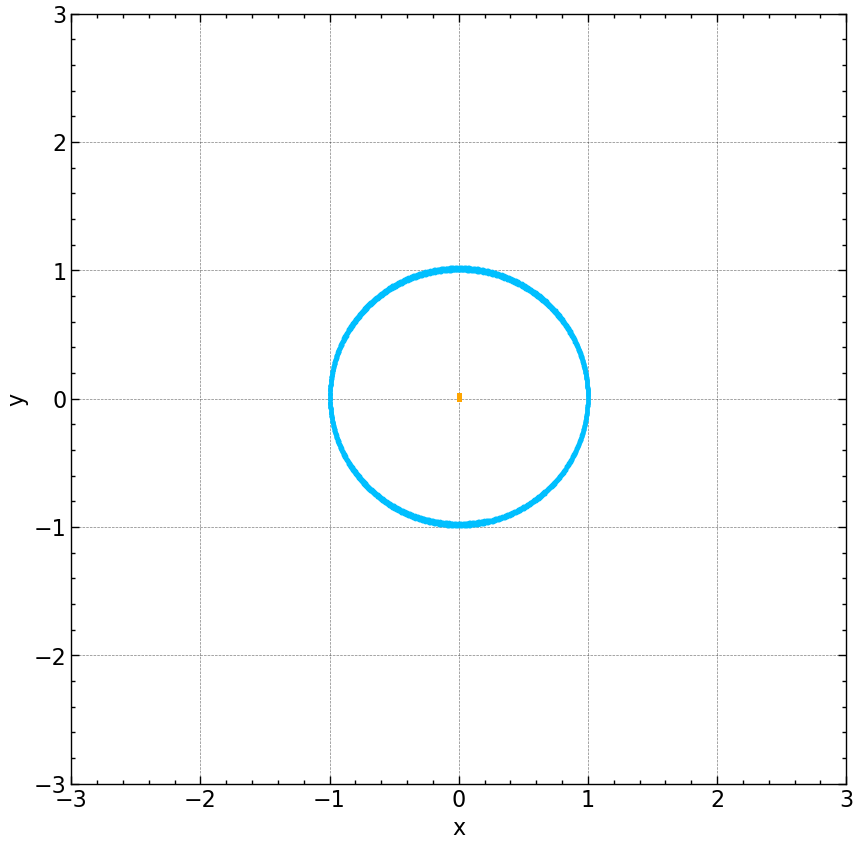

In [9]:
plt.scatter(x1, y1, marker='o', s=5, color='orange')
plt.scatter(x2, y2, marker='o', s=3, color='deepskyblue')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('x')
plt.ylabel('y')

### Animation

In [10]:
# if len(x1)=N, then the animation will have N/k frames
k = 10 

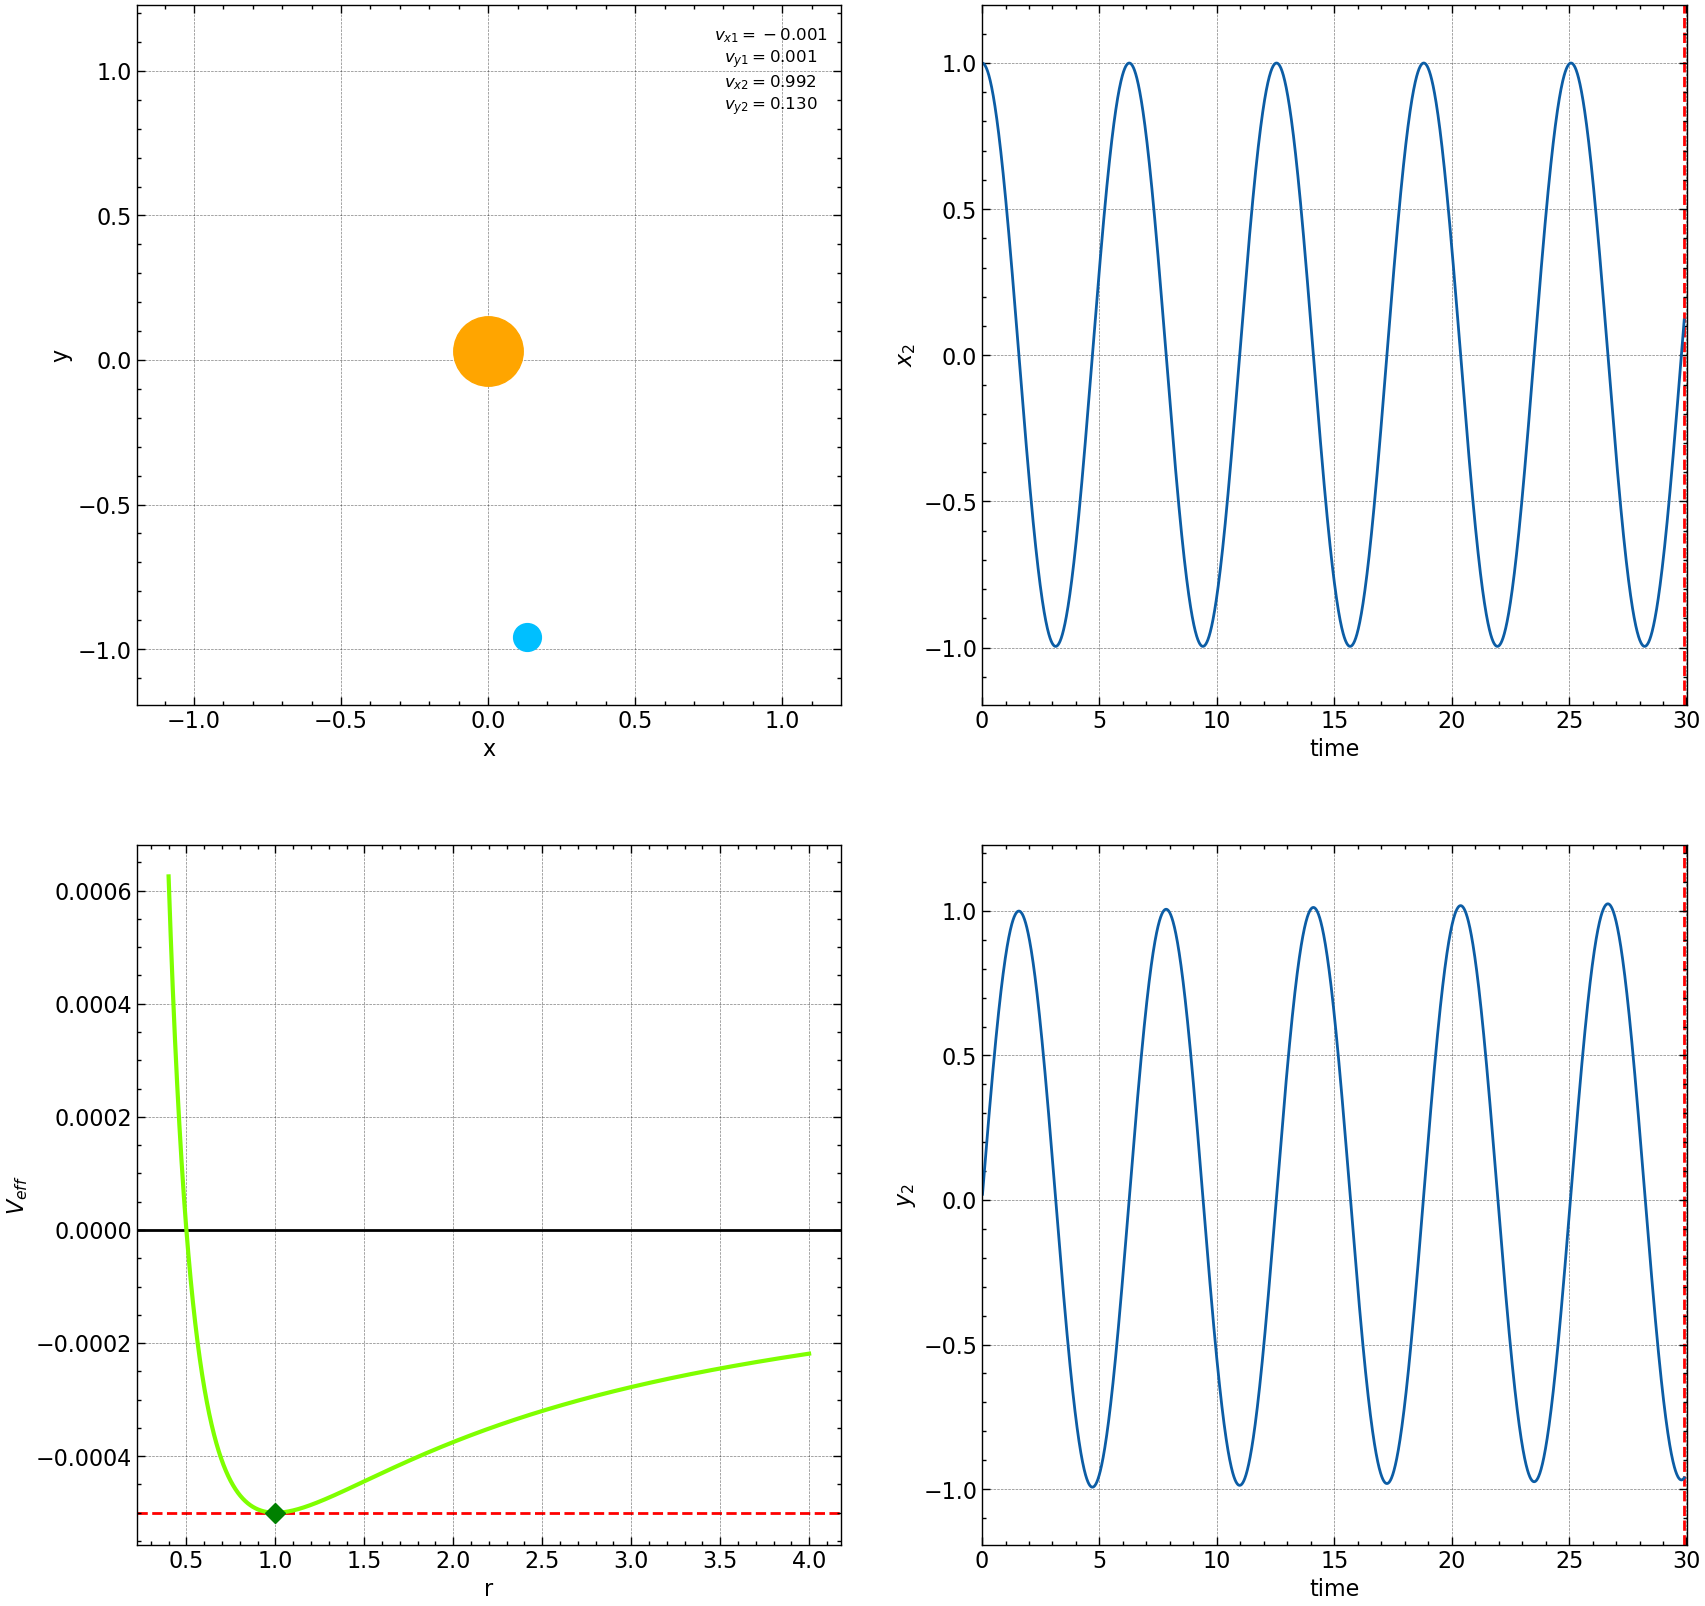

In [11]:
#fig = plt.Figure() #somehow faster than fig, ax = plt.subplots(1,1), but text doesn't work well
#ax = fig.add_subplot()
plt.rcParams['figure.figsize'] = [20 , 20]
fig, axes = plt.subplots(2,2)

ax = axes[0][0]
ax.clear()
ax.set_xlim(1.2*np.min(x2), 1.2*np.max(x2))
ax.set_ylim(1.2*np.min(y2), 1.2*np.max(y2))
ax.set_xlabel('x')
ax.set_ylabel('y')
one, = ax.plot([], [], 'o', color='orange', markersize=50)
two, = ax.plot([], [], 'o', color='deepskyblue', markersize=20)
text = ax.text(-0.3, 2.05, 'asdasd', transform = fig.gca().transAxes, fontsize=12, backgroundcolor='white', ha='center', zorder=0)

ax = axes[1][0]
x_dense = np.linspace(0.4, 4, 10000)
ax.plot(x_dense, V_eff(x_dense), color='chartreuse', linewidth=3)
ax.axhline(0, ls='-', color='black', zorder=0)
ax.axhline(E_tot, ls='--', color='red', zorder=0)
ax.set_xlabel('r')
ax.set_ylabel('$V_{eff}$')
potential, = ax.plot([], [], 'D', color='green', markersize=10)

ax = axes[0][1]
ax.set_xlim(0, np.max(time))
ax.set_ylim(1.2*np.min(x2), 1.2*np.max(x2))
ax.set_xlabel('time')
ax.set_ylabel('$x_2$')
plot_x2, = ax.plot([],[])
plot_x2_vline = ax.axvline(0, linestyle='--', color='red', zorder=0)

ax = axes[1][1]
ax.set_xlim(0, np.max(time))
ax.set_ylim(1.2*np.min(y2), 1.2*np.max(y2))
ax.set_xlabel('time')
ax.set_ylabel('$y_2$')
plot_y2, = ax.plot([],[])
plot_y2_vline = ax.axvline(0, ls='--', c='red', zorder=0)


def animate(i):
    print(math.ceil(100*i*k/len(x1)), "%", end='\r')
    x_one, y_one = x1[k*i], y1[k*i]
    x_two, y_two = x2[k*i], y2[k*i]
    one.set_data([x_one], [y_one])
    two.set_data([x_two], [y_two])
    textstr = '\n'.join((
        r'$v_{x1} = %.3f$' %(vx1[k*i]),
        r'$v_{y1} = %.3f$' %(vy1[k*i]),
        r'$v_{x2} = %.3f$' %(vx2[k*i]),
        r'$v_{y2} = %.3f$' %(vy2[k*i])
        ))
    text.set_text(textstr)
    potential.set_data([dist[k*i]], [V_eff(dist[k*i])])
    plot_x2.set_data(time[:k*i], x2[:k*i])
    plot_y2.set_data(time[:k*i], y2[:k*i])
    plot_x2_vline.set_xdata([time[k*i], time[k*i]])
    plot_y2_vline.set_xdata([time[k*i], time[k*i]])
    return one, two,

writer = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, animate, frames=int(len(x1)/k), interval=1, blit=True)
ani.save('twobody.gif', writer=writer, dpi=100)